# Credit card fraud detection

The aim of this project is to predict whether a credit card transaction is fraudulent or not, based on the transaction amount, location and other transaction related data.
In our credit card fraud detection project, I’ll use Python, one of the most popular programming languages available. Our solution would detect if someone bypasses the security walls of our system and makes an illegitimate transaction.  
The dataset has credit card transactions, and its features are the result of PCA analysis. It has ‘Amount’, ‘Time’, and ‘Class’ features where ‘Amount’ shows the monetary value of every transaction, ‘Time’ shows the seconds elapsed between the first and the respective transaction, and ‘Class’ shows whether a  transaction is legit or not. 
In ‘Class’, value 1 represents a fraud transaction, and value 0 represents a valid transaction. 
In this project I will use Spyder IDE


In [4]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# load dataset
dataset= pd.read_csv('Z:/Study/ziggy std/Mr. Prakash Senapathi/task/TASK - 14_svm/creditcardfraud/creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Missing Value detection

In [6]:
#EDA
dataset. head()
dataset.shape
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Data Visualization

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

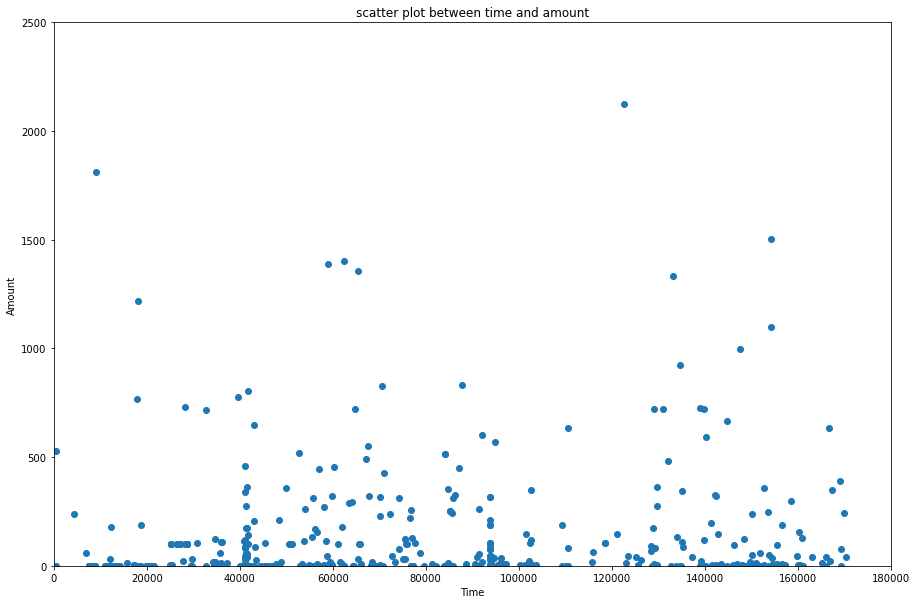

In [7]:
df=pd.DataFrame(dataset)
dataset.info()
dataset.describe()# All statics feature 
df_fraud = df[df['Class']==1]
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount'])# Display fraud amounts according to their time
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('scatter plot between time and amount')
plt.xlim([0,180000])
plt.ylim([0, 2500])
plt.show()

In [8]:

nb_big_fraud= df_fraud[df_fraud['Amount']>1000].shape
nb_big_fraud
str(df_fraud.shape[0])
print(f'there are only {str(nb_big_fraud)} fraund detected grater than 1000 out of {str(df_fraud.shape[0])}')


there are only (9, 31) fraund detected grater than 1000 out of 492


## Unbalanced data

In [9]:
number_fraud=len(dataset[dataset.Class==1])
number_not_fraud=len(dataset[dataset.Class==0])
print(f'here is {number_fraud} fraund in original dataset and {number_not_fraud} not fraud')

print("The accuracy of the classifier then would be : "+ str((284315-492)/284315)+ " which is the number of good classification over the number of tuple to classify")


here is 492 fraund in original dataset and 284315 not fraud
The accuracy of the classifier then would be : 0.998269524998681 which is the number of good classification over the number of tuple to classify


In [11]:
df_corr = df.corr()
df_corr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447


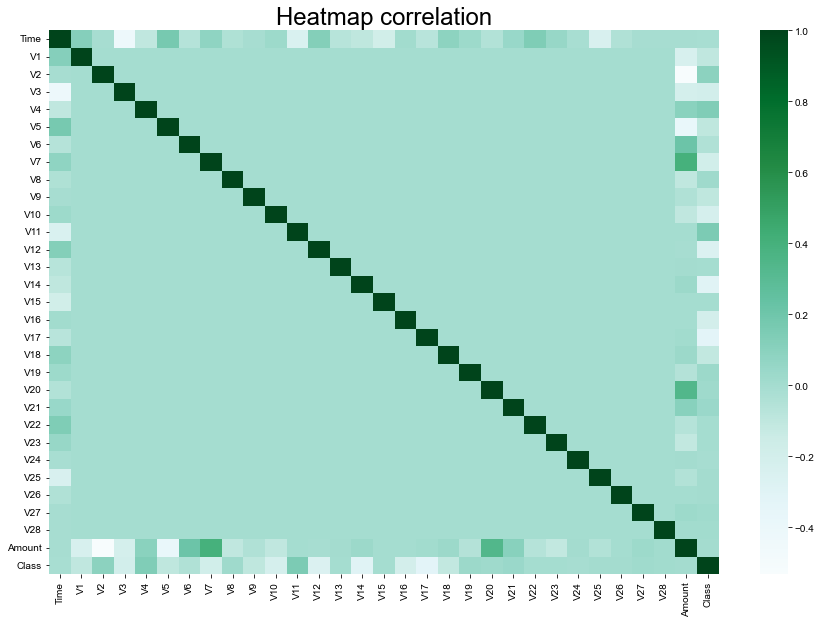

In [12]:

plt.figure(figsize=(15,10))
sns.heatmap(df_corr, cmap="BuGn")
sns.set(font_scale=2,style='white')
plt.title('Heatmap correlation')
plt.show()

In [13]:
rank = df_corr['Class'] # Retrieving the correlation coefficients per feature in relation to the feature class
df_rank = pd.DataFrame(rank) 
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) # Ranking the absolute values of the coefficients
                                                                  # in descending orde r

In [14]:
df_rank.dropna(inplace=True) # Removing Missing Data (not a number)

df_train_all= df[0:150000]
df_train_1= df_train_all[df_train_all['Class']==1]
df_train_0= df_train_all[df_train_all['Class']==0]
print(f' here we have {str(len(df_train_1))} numbers of fraud and {str(len(df_train_0))} number of not fraud of training data set ')


 here we have 293 numbers of fraud and 149707 number of not fraud of training data set 


In [15]:

df_sample=df_train_0.sample(300)
df_train=df_train_1.append(df_sample)
df_train=df_train.sample(frac=1)#mix the dataset


In [16]:

X_train= df_train.drop(['Time','Class'],axis=1)# drop feature Time and Class (label)
Y_train= df_train['Class']
X_train=np.asarray(X_train)
Y_train=np.asarray(Y_train)

In [17]:

df_test_all= df[150000:]
x_test= df_test_all.drop(['Time','Class'],axis=1)
y_test= df_test_all['Class']
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)

In [18]:
x_train_rank=df_train[df_rank.index[1:11]]
x_train_rank = np.asarray(x_train_rank)

In [19]:
X_test_all_rank = df_test_all[df_rank.index[1:11]]
X_test_all_rank = np.asarray(X_test_all_rank)
y_test = np.asarray(y_test)

## Confusion matrix

In [21]:
class_names= np.array(['0','1'])
def Confusion_matrix(cm,classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## model selection

In [22]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(X_train, Y_train)
np.unique(Y_train)
y_pred = classifier.predict(x_test)
import itertools

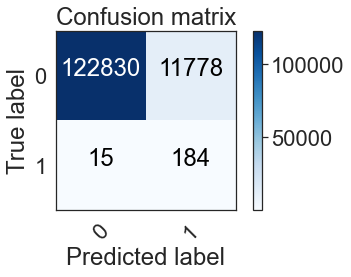

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
Confusion_matrix(cm,class_names) #calling the function

In [24]:
#  Accuracy (all correct / all) = TP + TN / TP + TN + FP + FN 
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))


Our criterion give a result of 0.9222023683737998


In [25]:

print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))


We have detected 184 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9246231155778895
the accuracy is : 0.9125193795574413


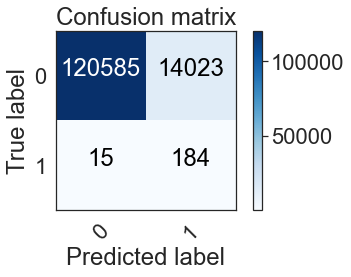

In [26]:
classifier.fit(x_train_rank, Y_train) # Then we train our model, with our balanced data train.
prediction_SVM = classifier.predict(X_test_all_rank) #And finally, we predict our data test.
cm = confusion_matrix(y_test, prediction_SVM)
Confusion_matrix(cm,class_names)


In [27]:

print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))


Our criterion give a result of 0.9188716807982289
We have detected 184 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9246231155778895
the accuracy is : 0.8958659416795863


## Models Rank

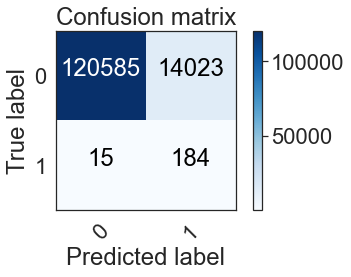

In [28]:
classifier.fit(x_train_rank, Y_train) # Then we train our model, with our balanced data train.
prediction_SVM = classifier.predict(X_test_all_rank) #And finally, we predict our data test.
cm = confusion_matrix(y_test, prediction_SVM)
Confusion_matrix(cm,class_names)


In [29]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

Our criterion give a result of 0.9188716807982289
We have detected 184 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9246231155778895
the accuracy is : 0.8958659416795863


In [30]:
classifier_b = SVC(kernel='linear')

classifier_b.fit(X_train, Y_train) # Then we train our model, with our balanced data train.


SVC(kernel='linear')

In [32]:
#prediction_SVM_b_all = classifier_b.predict(X_test_all_rank) #We predict all the data set.
#cm = confusion_matrix(y_test, prediction_SVM_b_all)
#Confusion_matrix(cm,class_names)
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

Our criterion give a result of 0.9188716807982289
We have detected 184 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9246231155778895
the accuracy is : 0.8958659416795863
